In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("EV_India.csv")
df.head(10)

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
1,2,Andra Pradesh,NaN,NaN,NaN
2,3,Arunachal Pradesh,20,"2,52,965","2,52,985"
3,4,Assam,64766,"46,77,053","47,41,819"
4,5,Bihar,83335,"1,04,07,078","1,04,90,413"
5,6,Chandigarh,2812,"7,46,881","7,49,693"
6,7,Chhattisgarh,20966,"68,36,200","68,57,166"
7,8,Delhi,"1,56,393","76,85,600","78,41,993"
8,9,Goa,3870,"10,71,570","10,75,440"
9,10,Gujarat,45272,"2,06,05,484","2,06,50,756"


In [3]:
df.dtypes

Sr. No.                        int64
State Name                    object
Total Electric Vehicle        object
Total Non-Electric Vehicle    object
Total                         object
dtype: object

In [4]:
df.shape

(36, 5)

In [5]:
df['Total Electric Vehicle'] = df['Total Electric Vehicle'].str.replace(',', '').astype(float)
df['Total Non-Electric Vehicle'] = df['Total Non-Electric Vehicle'].str.replace(',', '').astype(float)
df['Total'] = df['Total'].str.replace(',', '').astype(float)

In [6]:
df.head(10)

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162.0,146945.0,147107.0
1,2,Andra Pradesh,NaN,NaN,NaN
2,3,Arunachal Pradesh,20.0,252965.0,252985.0
3,4,Assam,64766.0,4677053.0,4741819.0
4,5,Bihar,83335.0,10407078.0,10490413.0
5,6,Chandigarh,2812.0,746881.0,749693.0
6,7,Chhattisgarh,20966.0,6836200.0,6857166.0
7,8,Delhi,156393.0,7685600.0,7841993.0
8,9,Goa,3870.0,1071570.0,1075440.0
9,10,Gujarat,45272.0,20605484.0,20650756.0


In [7]:
df.dtypes

Sr. No.                         int64
State Name                     object
Total Electric Vehicle        float64
Total Non-Electric Vehicle    float64
Total                         float64
dtype: object

In [8]:
df['Total'].sum()

279504016.0

In [9]:
df['State Name'].unique()

array(['Andaman & Nicobar Island', 'Andra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'UT of DNH and DD',
       'Uttarakhand', 'Uttar Pradesh', 'West Bengal'], dtype=object)

In [10]:
df1=df.copy()
df=df.drop('Sr. No.',axis=1)

<BarContainer object of 36 artists>

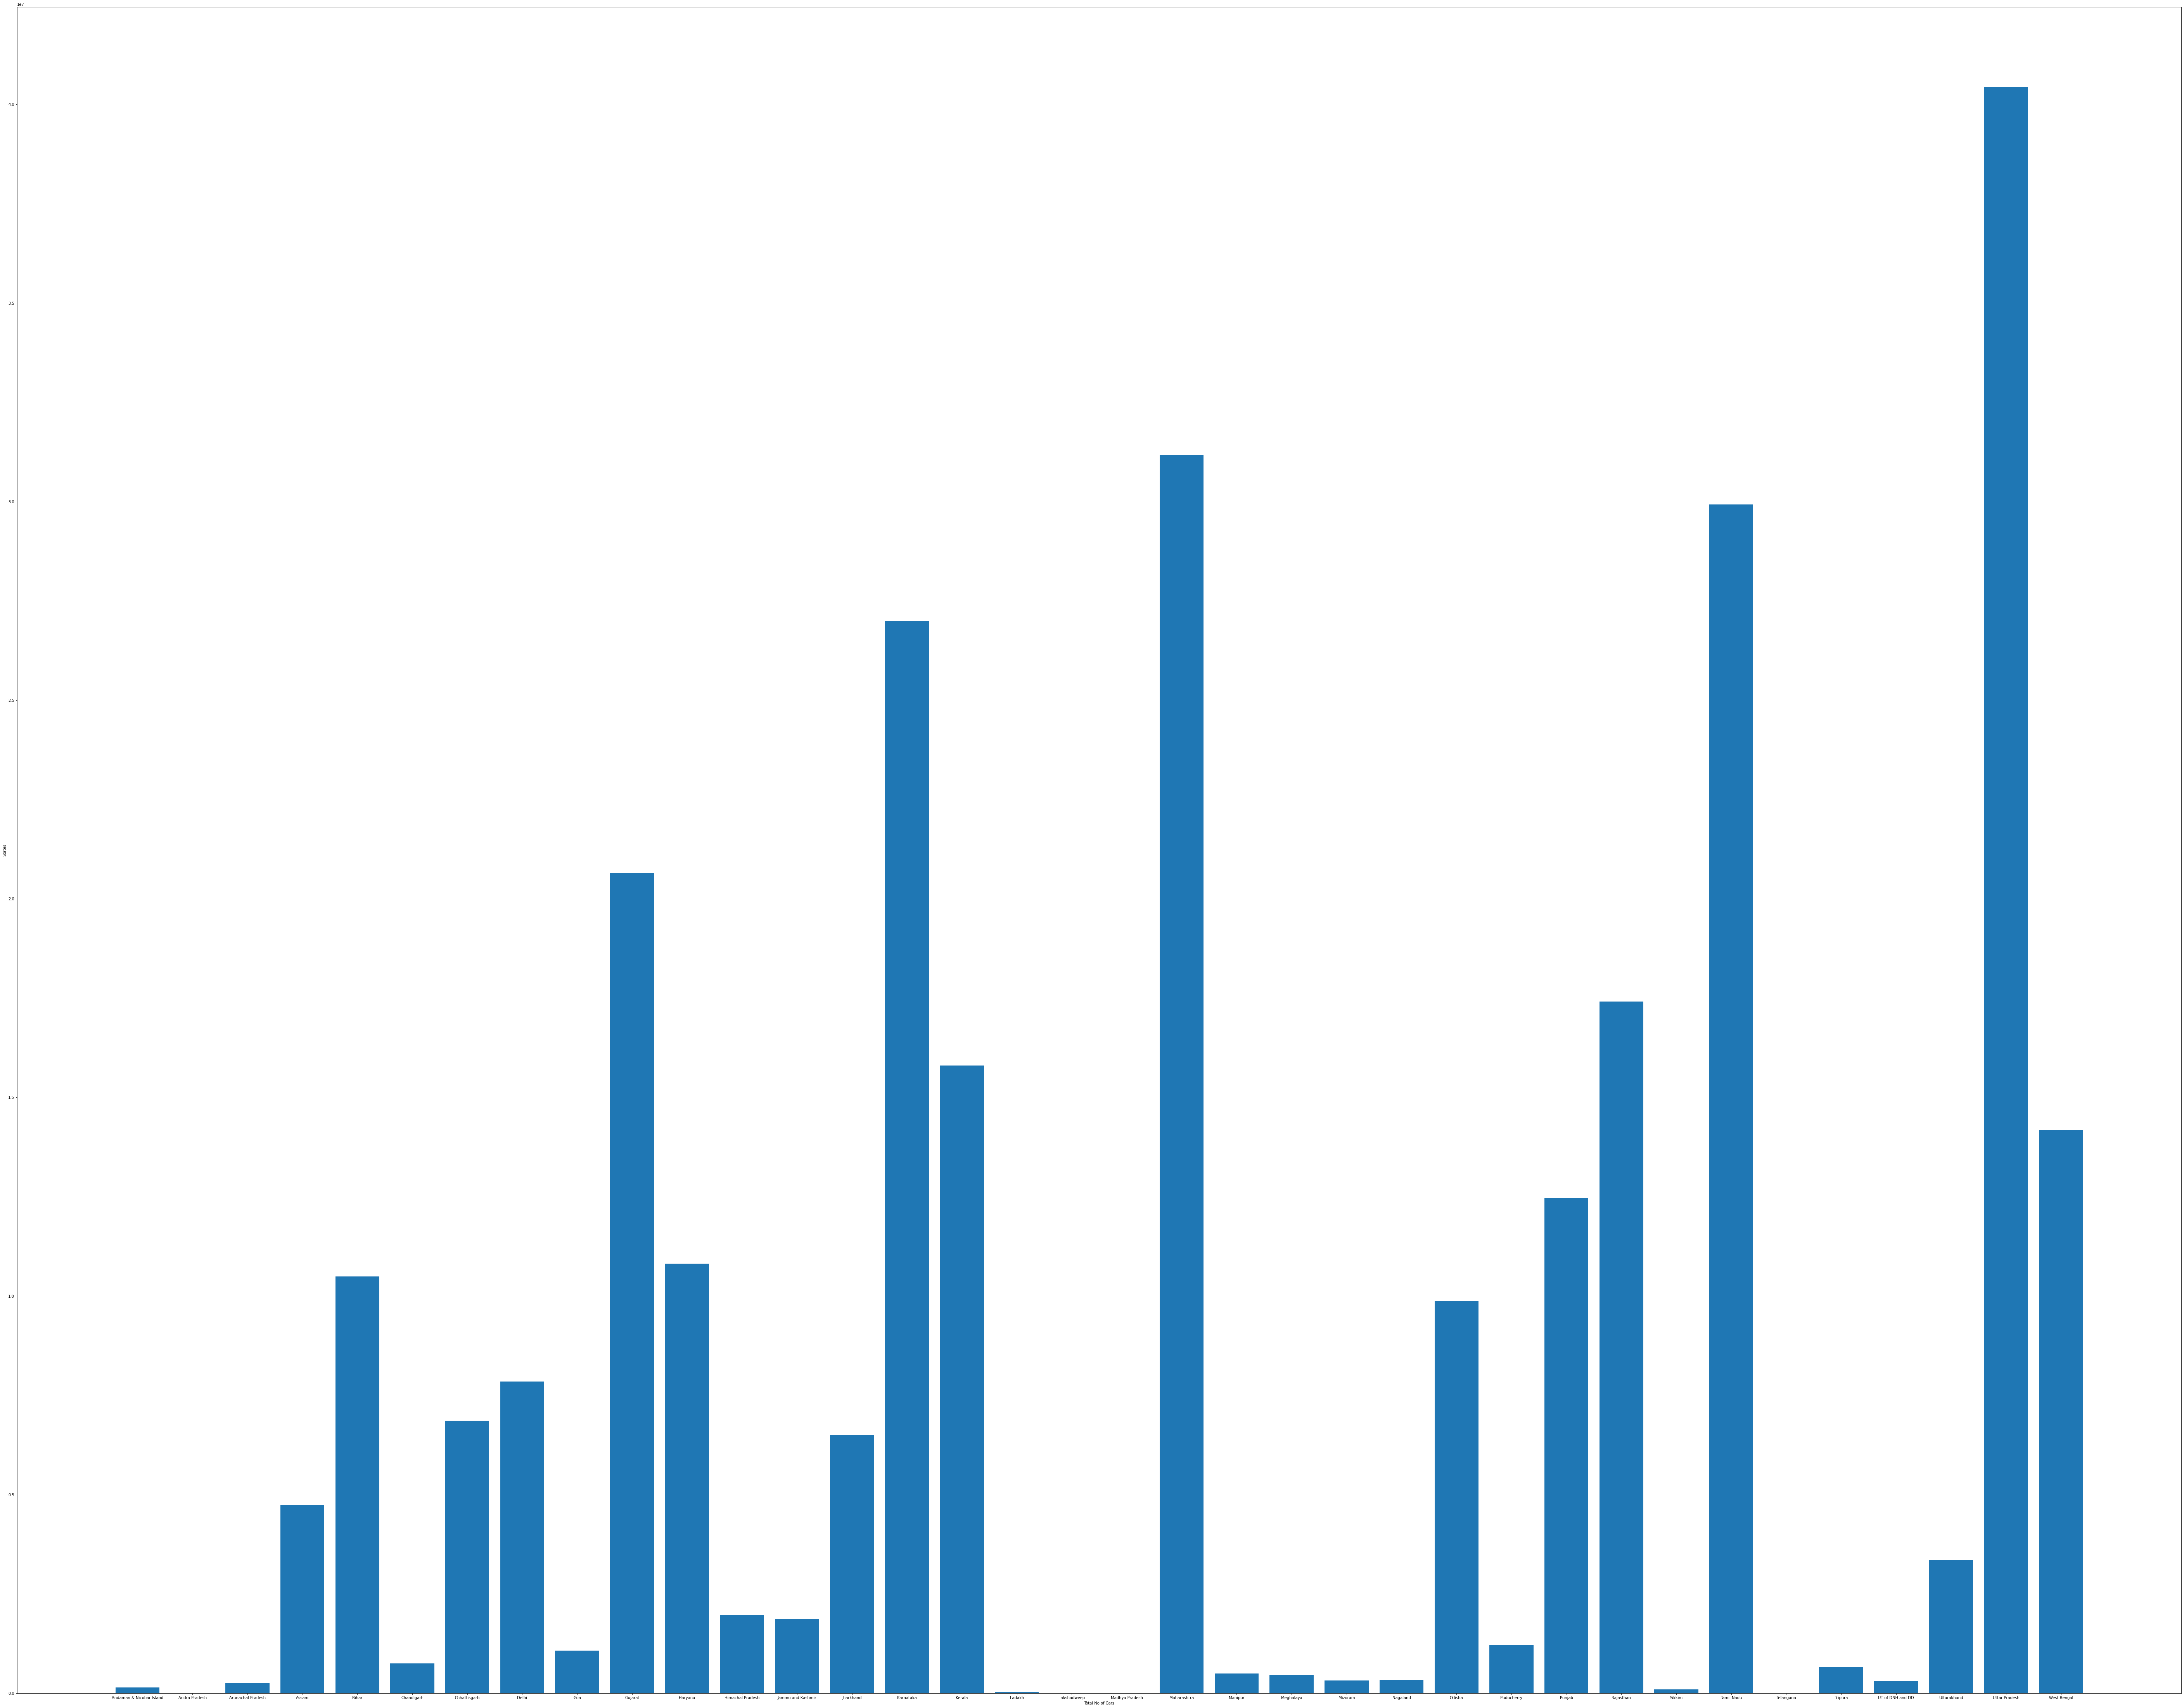

In [44]:
plt.figure(figsize=(100,80))
plt.xlabel('Total No of Cars')
plt.ylabel('States')
plt.bar(df['State Name'],df['Total'])

<BarContainer object of 36 artists>

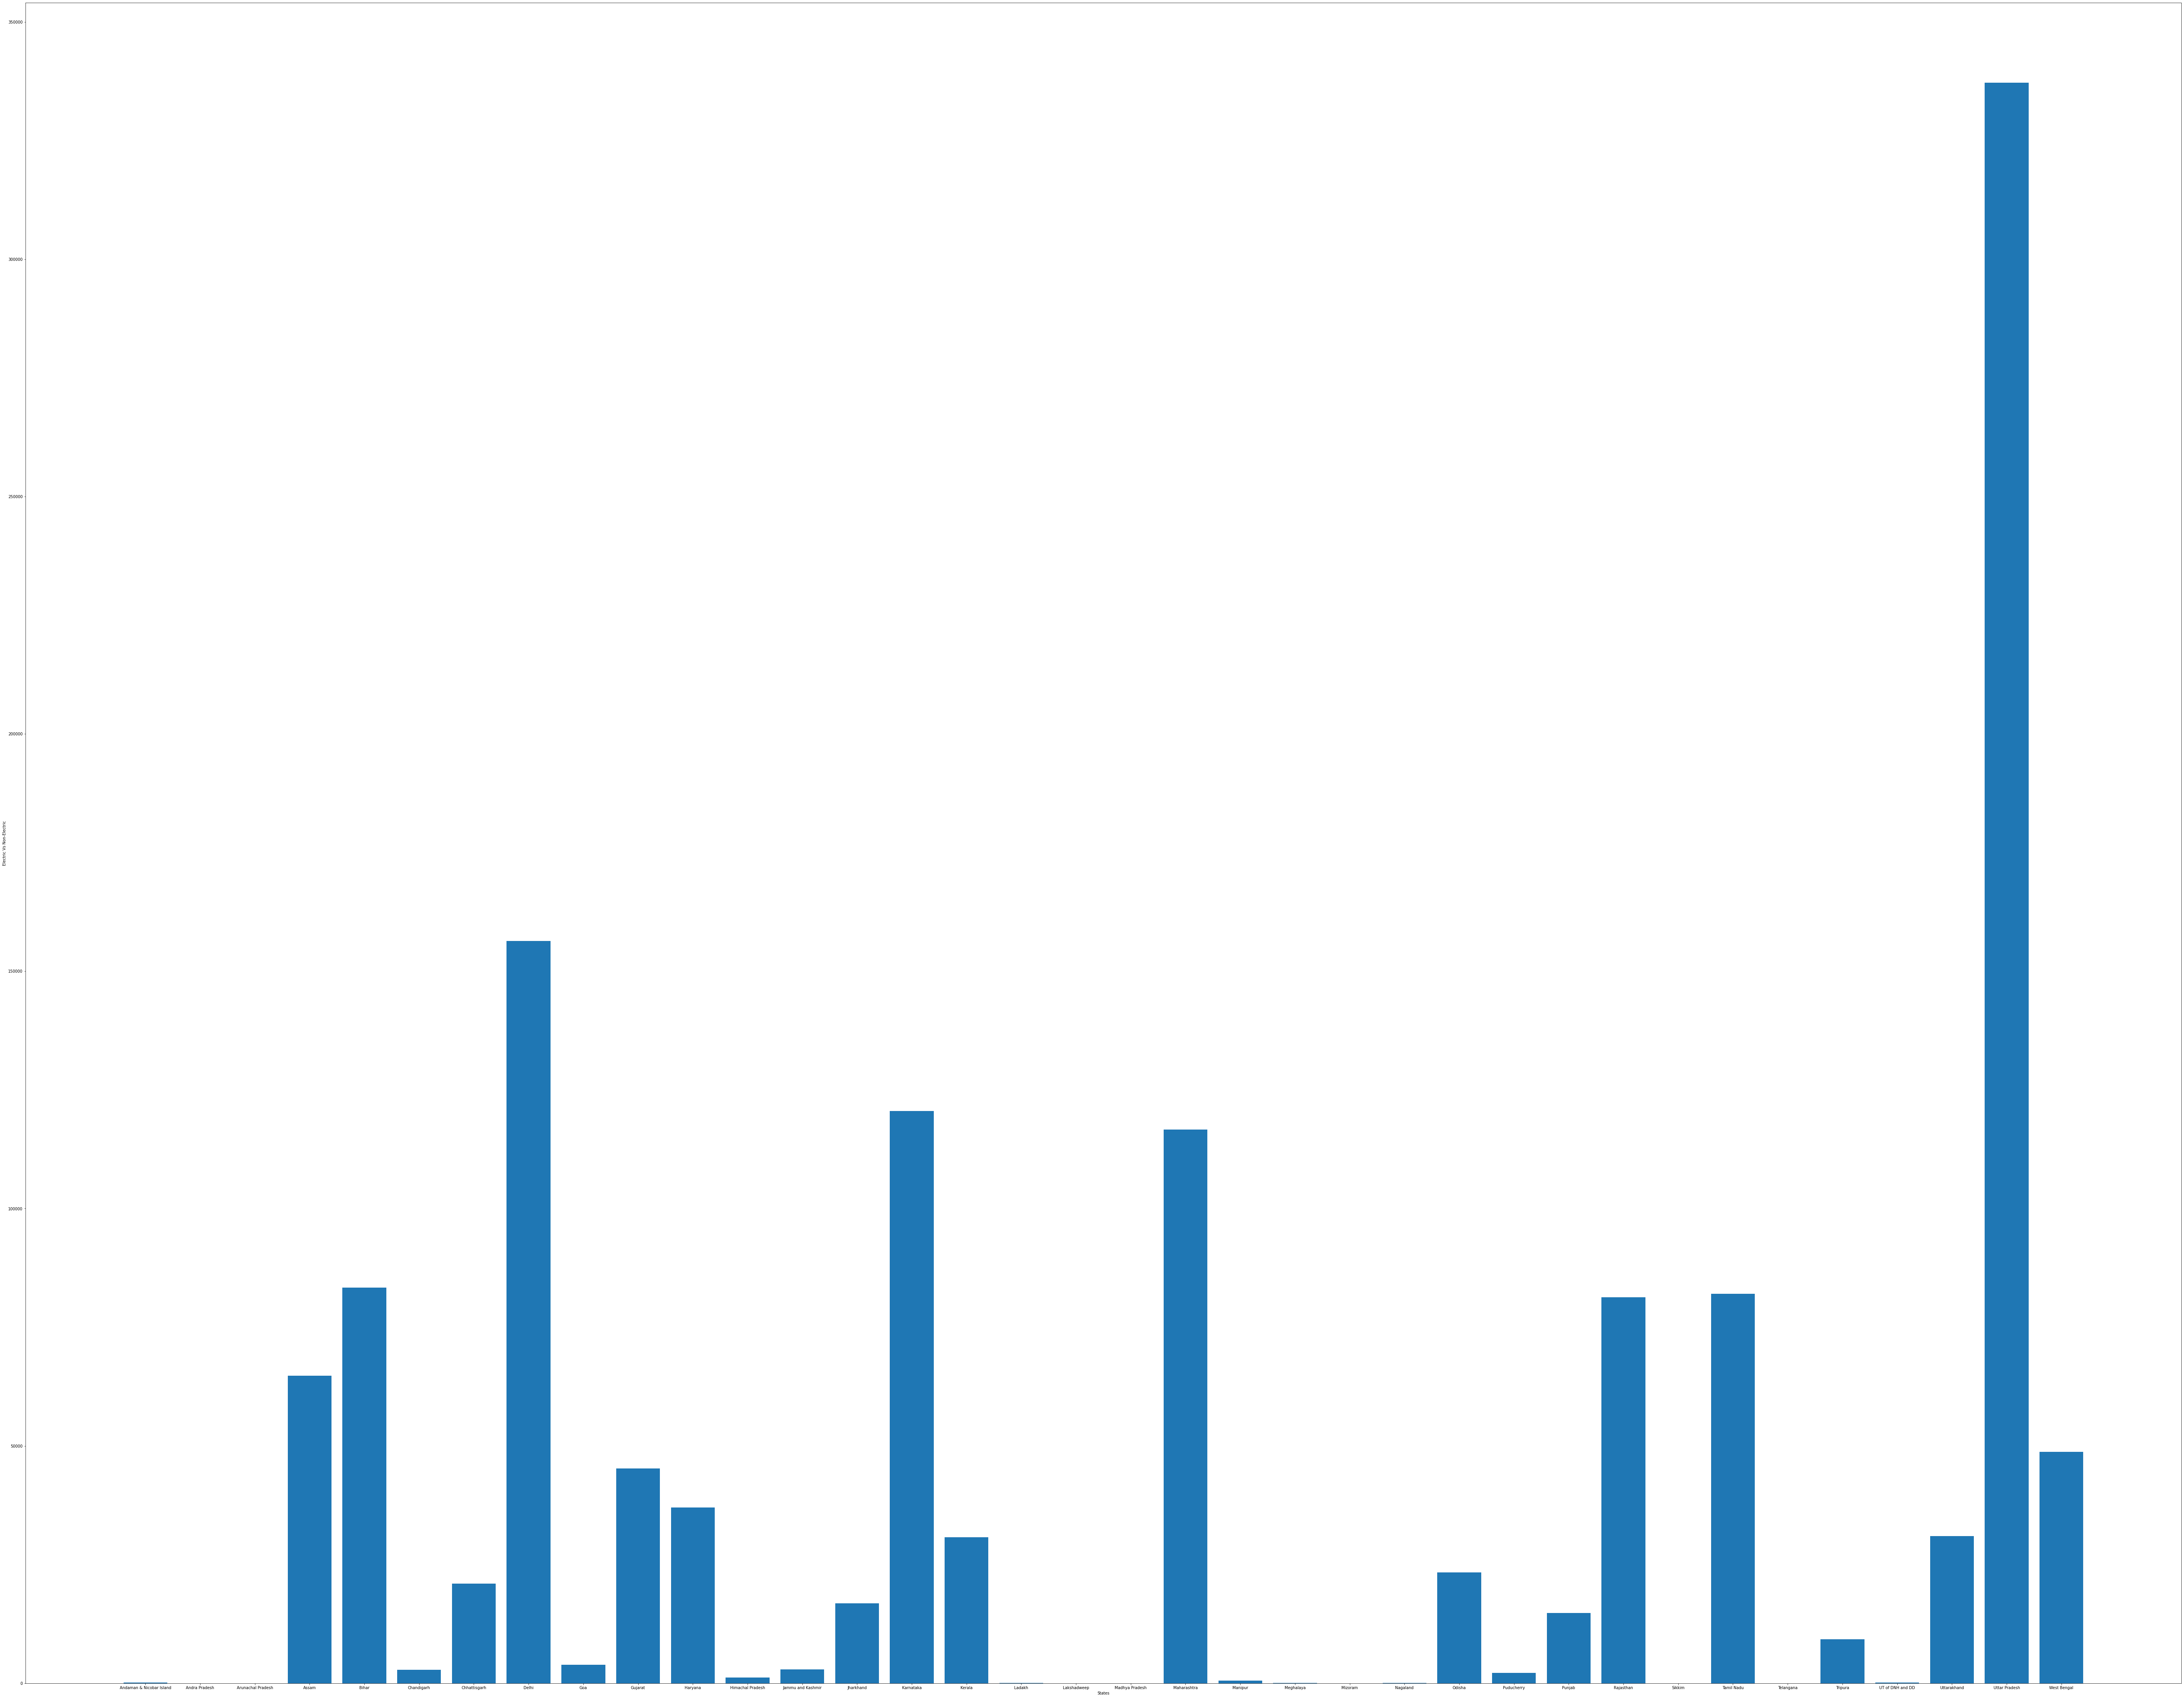

In [12]:
plt.figure(figsize=(100,80))
plt.ylabel('Electric Vs Non-Electric')
plt.xlabel('States')
plt.bar(df['State Name'],df['Total Electric Vehicle'])

<BarContainer object of 36 artists>

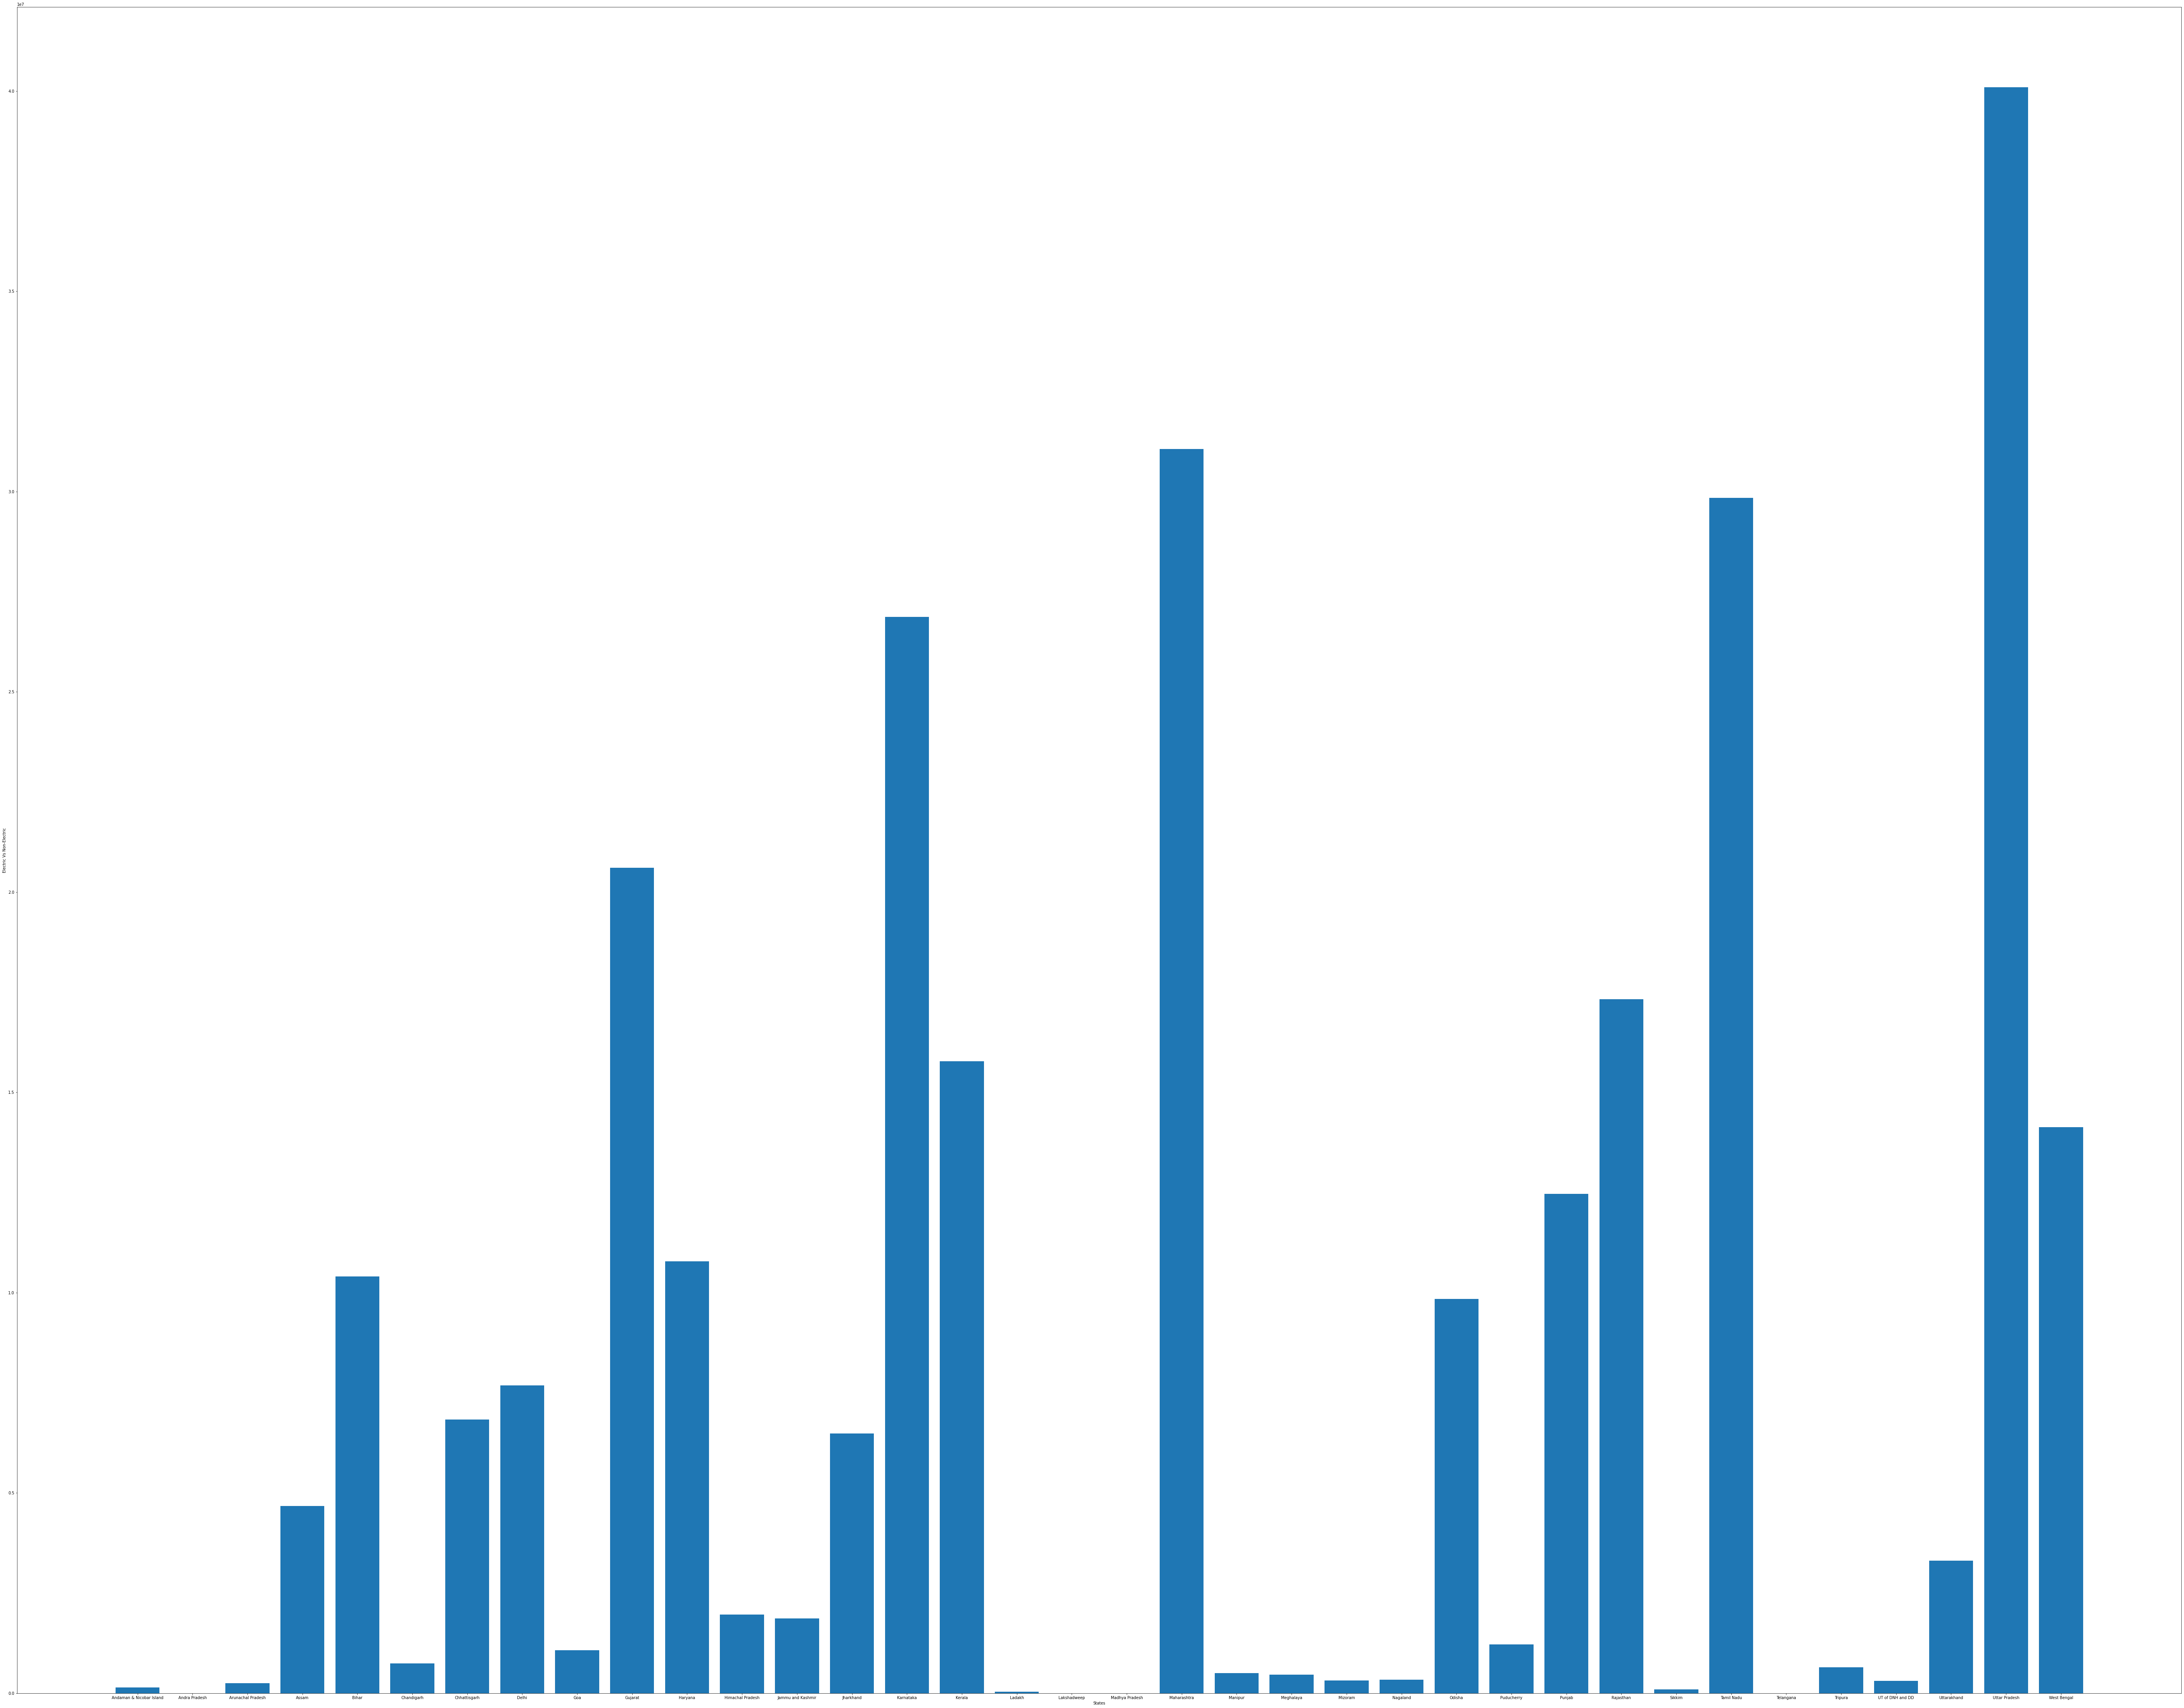

In [13]:
plt.figure(figsize=(100,80))
plt.ylabel('Electric Vs Non-Electric')
plt.xlabel('States')
plt.bar(df['State Name'],df['Total Non-Electric Vehicle'])

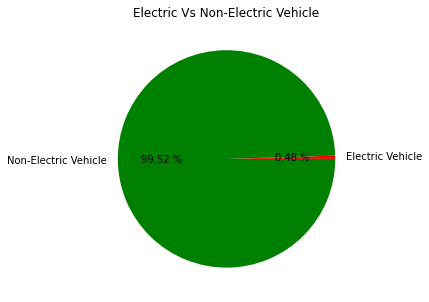

In [14]:
x=df['Total Electric Vehicle'].sum()
y=df['Total Non-Electric Vehicle'].sum()
plt.figure(figsize=(8,5))

labels = ['Electric Vehicle', 'Non-Electric Vehicle']
colors = ['red', 'green']

plt.pie([x, y], labels = labels, colors=colors,autopct='%.2f %%')

plt.title('Electric Vs Non-Electric Vehicle')

plt.show()

In [15]:
X=df[['Total Electric Vehicle','Total']]
A=df[['Total Electric Vehicle','Total Non-Electric Vehicle','Total']]

In [16]:
X

,Total Electric Vehicle,Total
0,162.0,147107.0
1,NaN,NaN
2,20.0,252985.0
3,64766.0,4741819.0
4,83335.0,10490413.0
5,2812.0,749693.0
6,20966.0,6857166.0
7,156393.0,7841993.0
8,3870.0,1075440.0
9,45272.0,20650756.0


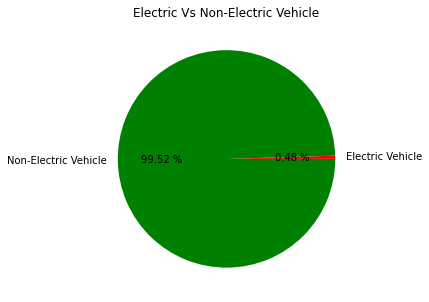

In [41]:
x=A['Total Electric Vehicle'].sum()
y=A['Total'].sum()
plt.figure(figsize=(8,5))

labels = ['Electric Vehicle', 'Non-Electric Vehicle']
colors = ['red', 'green']

plt.pie([x, y], labels = labels, colors=colors,autopct='%.2f %%')

plt.title('Electric Vs Non-Electric Vehicle')

plt.show()

In [18]:
X.isnull().sum()

Total Electric Vehicle    4
Total                     4
dtype: int64

In [19]:
X=X.dropna()

In [42]:
###Kmeans

In [20]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [21]:
wcss

[3646187977230064.0,
 958145133968116.1,
 318226029822268.5,
 180331782943291.94,
 88448955036186.55,
 50661751511074.0,
 35121888157416.438,
 26133223905628.555,
 16880770900849.168]

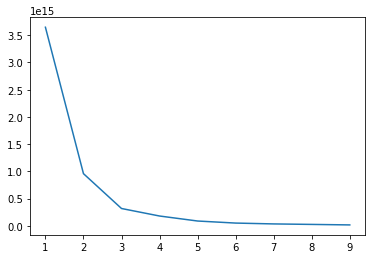

In [22]:
plt.plot(range(1,10),wcss)

In [23]:
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(X)
X['Cluster']=kmeans.fit_predict(X)

C:\Users\vince\AppData\Local\Temp\ipykernel_13420\1672383930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster']=kmeans.fit_predict(X)


In [24]:
X

,Total Electric Vehicle,Total,Cluster
0,162.0,147107.0,0
2,20.0,252985.0,0
3,64766.0,4741819.0,0
4,83335.0,10490413.0,3
5,2812.0,749693.0,0
6,20966.0,6857166.0,3
7,156393.0,7841993.0,3
8,3870.0,1075440.0,0
9,45272.0,20650756.0,2
10,37035.0,10815305.0,3


In [25]:
X[X.Cluster==0]

,Total Electric Vehicle,Total,Cluster
0,162.0,147107.0,0
2,20.0,252985.0,0
3,64766.0,4741819.0,0
5,2812.0,749693.0,0
8,3870.0,1075440.0,0
11,1175.0,1965929.0,0
12,2941.0,1872903.0,0
16,26.0,38328.0,0
20,586.0,499910.0,0
21,49.0,459050.0,0


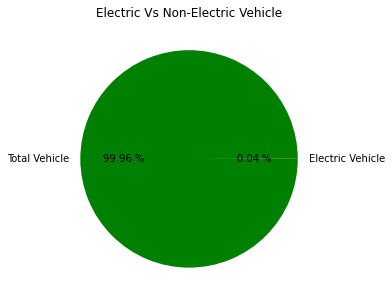

In [26]:
x=X.loc[X['Cluster'] == 0, 'Total Electric Vehicle'].sum()
y=X['Total'].sum()
plt.figure(figsize=(8,5))

labels = ['Electric Vehicle', 'Total Vehicle']
colors = ['red', 'green']

plt.pie([x, y], labels = labels, colors=colors,autopct='%.2f %%')

plt.title('Electric Vs Non-Electric Vehicle')

plt.show()

In [27]:
y

279504016.0

In [28]:
X[X.Cluster==1]

,Total Electric Vehicle,Total,Cluster
14,120532.0,26990835.0,1
19,116646.0,31175636.0,1
29,82051.0,29924427.0,1
34,337180.0,40429670.0,1


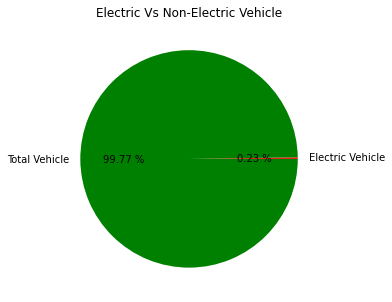

In [29]:
x=X.loc[X['Cluster'] == 1, 'Total Electric Vehicle'].sum()
#y=X.loc[X['Cluster'] == 1, 'Total'].sum()
y=X['Total'].sum()
plt.figure(figsize=(8,5))

labels = ['Electric Vehicle', 'Total Vehicle']
colors = ['red', 'green']

plt.pie([x, y], labels = labels, colors=colors,autopct='%.2f %%')

plt.title('Electric Vs Non-Electric Vehicle')

plt.show()

In [30]:
X[X.Cluster==2]

,Total Electric Vehicle,Total,Cluster
9,45272.0,20650756.0,2
15,30775.0,15804853.0,2
27,81338.0,17408726.0,2
35,48767.0,14182938.0,2


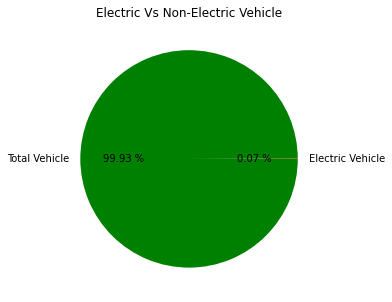

In [31]:
x=X.loc[X['Cluster'] == 2, 'Total Electric Vehicle'].sum()
#y=X.loc[X['Cluster'] == 2, 'Total'].sum()
y=X['Total'].sum()
plt.figure(figsize=(8,5))

labels = ['Electric Vehicle', 'Total Vehicle']
colors = ['red', 'green']

plt.pie([x, y], labels = labels, colors=colors,autopct='%.2f %%')

plt.title('Electric Vs Non-Electric Vehicle')

plt.show()

In [32]:
X[X.Cluster==3]

,Total Electric Vehicle,Total,Cluster
4,83335.0,10490413.0,3
6,20966.0,6857166.0,3
7,156393.0,7841993.0,3
10,37035.0,10815305.0,3
13,16811.0,6503748.0,3
24,23371.0,9868444.0,3
26,14804.0,12477823.0,3


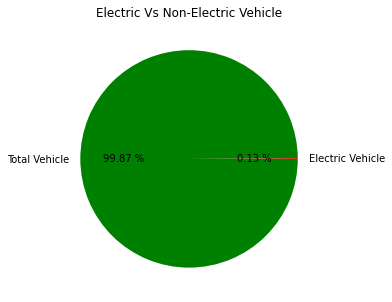

In [33]:
x=X.loc[X['Cluster'] == 3, 'Total Electric Vehicle'].sum()
#y=X.loc[X['Cluster'] == 3, 'Total'].sum()
y=X['Total'].sum()
plt.figure(figsize=(8,5))

labels = ['Electric Vehicle', 'Total Vehicle']
colors = ['red', 'green']

plt.pie([x, y], labels = labels, colors=colors,autopct='%.2f %%')

plt.title('Electric Vs Non-Electric Vehicle')

plt.show()

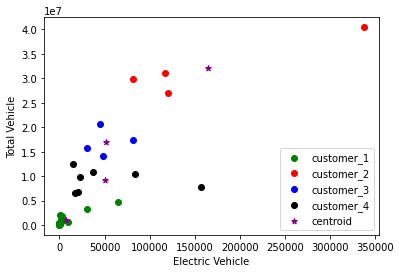

In [34]:
df1 = X[X.Cluster==0]
df2 = X[X.Cluster==1]
df3 = X[X.Cluster==2]
df4 = X[X.Cluster==3]
plt.scatter(df1['Total Electric Vehicle'],df1['Total'],color='green',label='customer_1')
plt.scatter(df2['Total Electric Vehicle'],df2['Total'],color='red',label='customer_2')
plt.scatter(df3['Total Electric Vehicle'],df3['Total'],color='blue',label='customer_3')
plt.scatter(df4['Total Electric Vehicle'],df4['Total'],color='black',label='customer_4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.ylabel('Total Vehicle')
plt.xlabel('Electric Vehicle')
plt.legend()

In [35]:
scaler = MinMaxScaler()

scaler.fit(X[['Total Electric Vehicle']])
X['Total Electric Vehicle'] = scaler.transform(X[['Total Electric Vehicle']])

scaler.fit(X[['Total']])
X['Total'] = scaler.transform(X[['Total']])

C:\Users\vince\AppData\Local\Temp\ipykernel_13420\2557356812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Total Electric Vehicle'] = scaler.transform(X[['Total Electric Vehicle']])
C:\Users\vince\AppData\Local\Temp\ipykernel_13420\2557356812.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Total'] = scaler.transform(X[['Total']])


In [36]:
X.head()

,Total Electric Vehicle,Total,Cluster
0,0.000421,0.002693,0
2,0.000000,0.005314,0
3,0.192033,0.116448,0
4,0.247108,0.258770,3
5,0.008281,0.017612,0


In [37]:
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(X)
X['Cluster']=kmeans.fit_predict(X)

C:\Users\vince\AppData\Local\Temp\ipykernel_13420\1672383930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster']=kmeans.fit_predict(X)


In [38]:
X[X.Cluster==0]

,Total Electric Vehicle,Total,Cluster
4,0.247108,0.258770,0
6,0.062125,0.168819,0
7,0.463795,0.193201,0
10,0.109785,0.266814,0
13,0.049801,0.160069,0
24,0.069258,0.243372,0
26,0.043849,0.307974,0


In [39]:
X[X.Cluster==1]

,Total Electric Vehicle,Total,Cluster
0,0.000421,0.002693,1
2,0.000000,0.005314,1
3,0.192033,0.116448,1
5,0.008281,0.017612,1
8,0.011419,0.025677,1
11,0.003426,0.047723,1
12,0.008664,0.045420,1
16,0.000018,0.000000,1
20,0.001679,0.011428,1
21,0.000086,0.010416,1


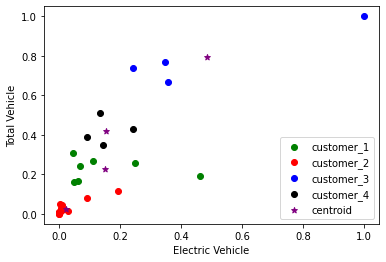

In [40]:
df1 = X[X.Cluster==0]
df2 = X[X.Cluster==1]
df3 = X[X.Cluster==2]
df4 = X[X.Cluster==3]
plt.scatter(df1['Total Electric Vehicle'],df1['Total'],color='green',label='customer_1')
plt.scatter(df2['Total Electric Vehicle'],df2['Total'],color='red',label='customer_2')
plt.scatter(df3['Total Electric Vehicle'],df3['Total'],color='blue',label='customer_3')
plt.scatter(df4['Total Electric Vehicle'],df4['Total'],color='black',label='customer_4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.ylabel('Total Vehicle')
plt.xlabel('Electric Vehicle')
plt.legend()